In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from math import sqrt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('data/diamonds.csv',index_col=0)

In [4]:
# q75,q25 = np.percentile(df['depth'],[75,25])
# cut_off = (q75 - q25)* 1.5 # 1.5 is 
# lower, upper = q25 - cut_off, q75 + cut_off
# lower,upper

In [5]:
#check the columns and records in df and test dfset
print('No. of records in dataset ', df.shape[0])
print('No. of column in dataset ', df.shape[1])

No. of records in dataset  53940
No. of column in dataset  10


In [6]:
#dropping the records with missing dimensions
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [7]:
#check for missing values in the dfset
print('Missing values in df set',sum(df.isna().sum()))

Missing values in df set 0


In [8]:
df['price'].describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

the above code reflects the average price of the diamond is 3932$. Next, we will show the relationship between the columns to examine the correlation between the features and the target.

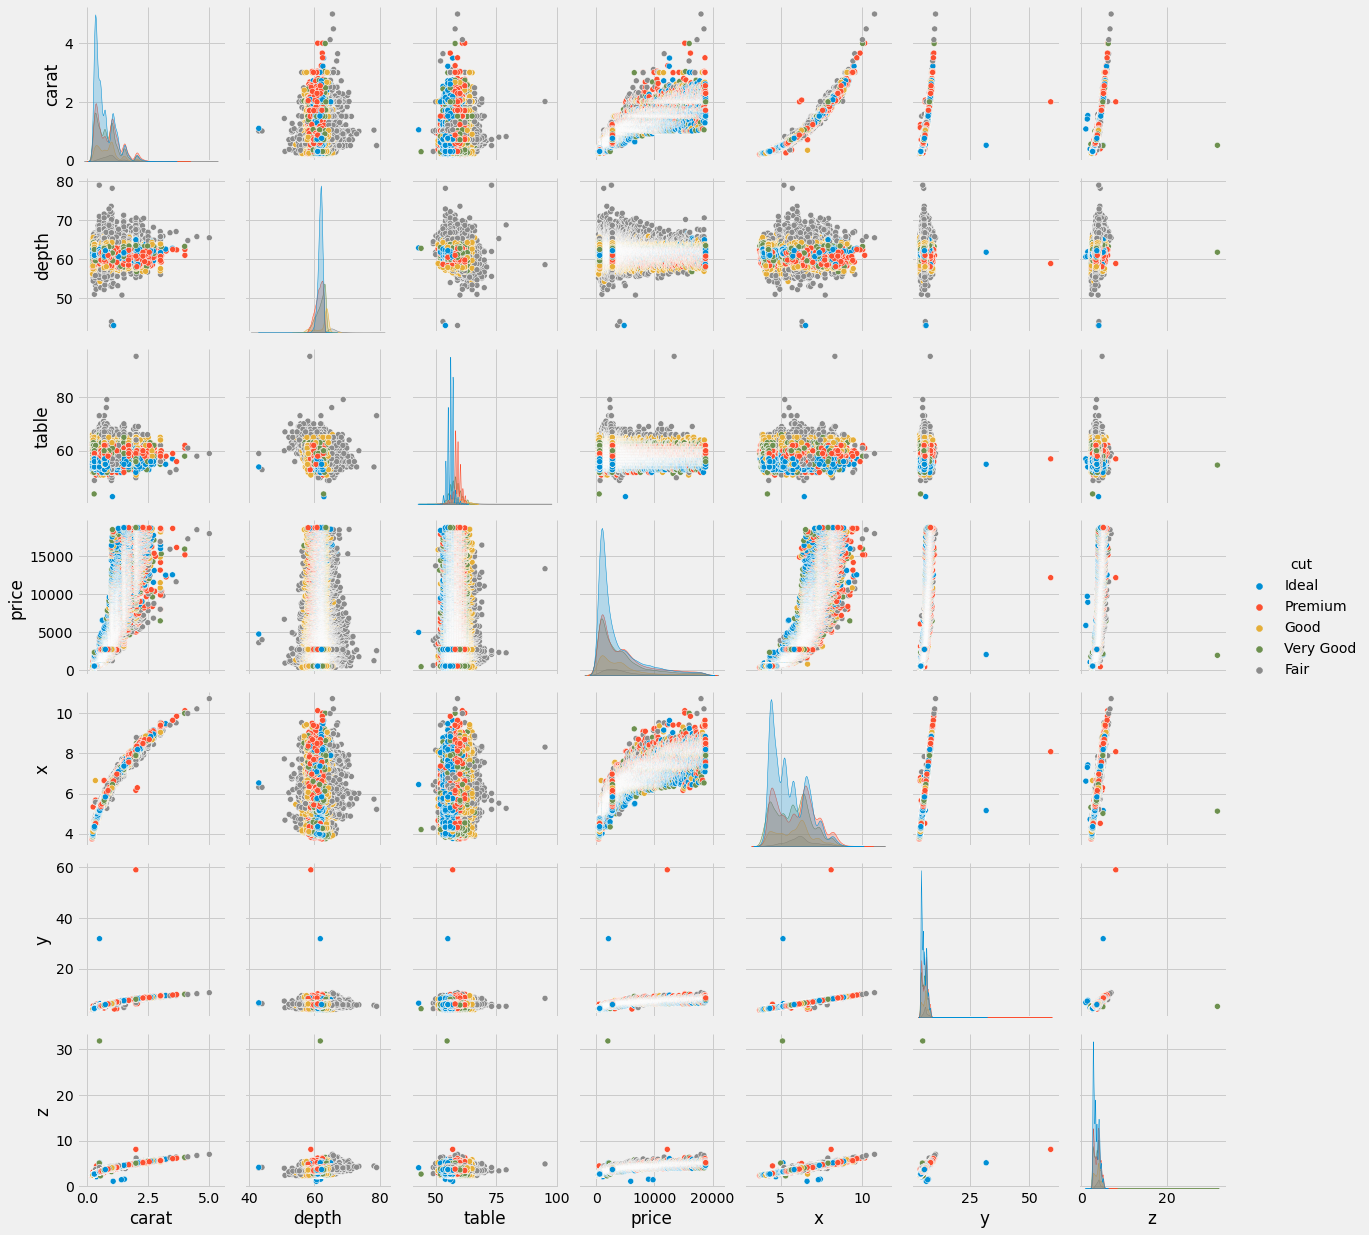

In [9]:
sns.pairplot(df,hue='cut')

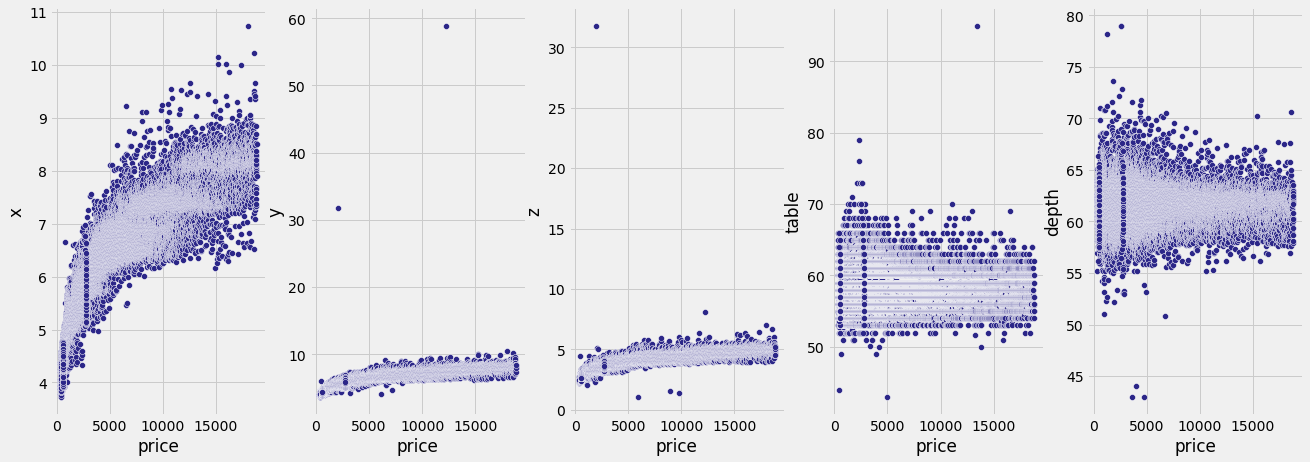

In [10]:
sns.set_palette("CMRmap")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = df, x = df['price'], y = df[i], ax = axs[c])
    c+=1

removing the outliers

In [11]:
df = df[(df['x'] < 9.285)]
df = df[(df['y'] < 9.27)]
df = df[(df['z'] < 5.734) & (df['z'] > 2)]
df = df[(df['table'] < 71) & (df['table'] > 51.5)]
df = df[(df['depth'] < 72.5) & (df['depth'] > 54)]

df.shape

(53834, 10)

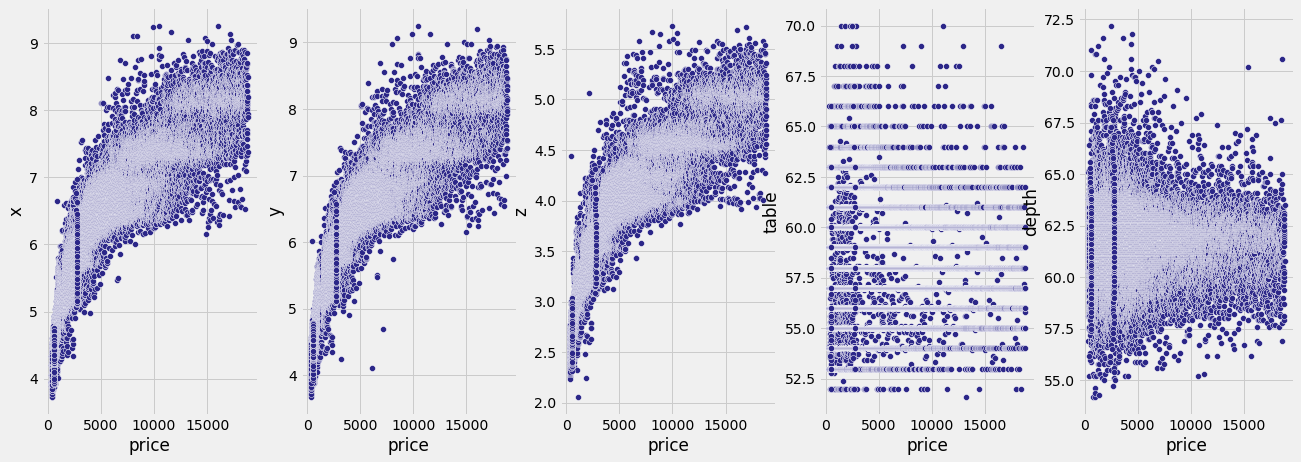

In [12]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = df, x = df['price'], y = df[i], ax = axs[c])
    c+=1

encoding the vars

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df2 = df.copy(deep=True)

In [15]:
cat = ['cut','color','clarity']
non_cat = ['carat','price','x','y','z','table','depth']
for col in cat:
    df = pd.concat([df,(pd.get_dummies(df[col],drop_first=True))],axis=1).drop([col],axis=1)

In [16]:
# df['cut']=df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
# df['color']=df['color'].map({'J':6,'I':5,'H':4,'G':3,'F':2,'E':1,'D':0})
# df['clarity']=df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [17]:
corr = df[non_cat].corr()
# print('The most correlated Features with selling_price : '), print(corr['price'].sort_values(ascending=False)[:],'\n')

<AxesSubplot:>

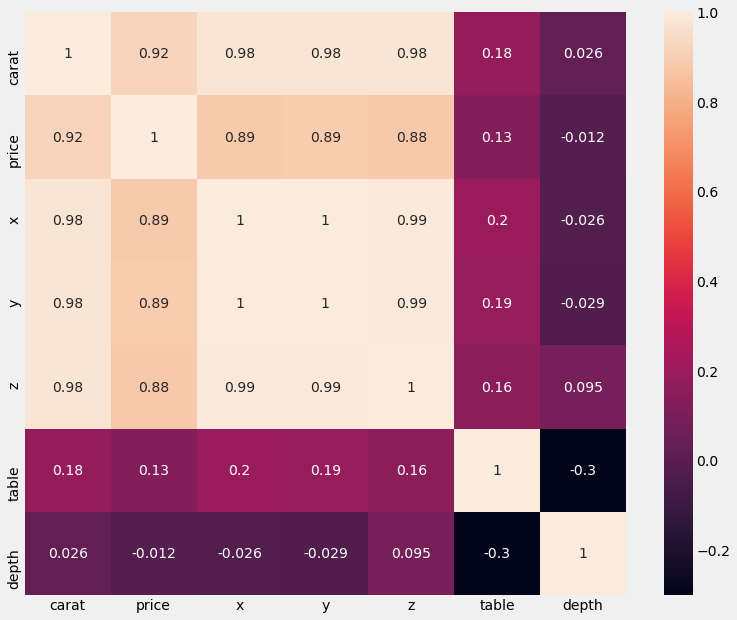

In [18]:
figure, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot=True)

In [19]:
df.shape

(53834, 24)

The price and the carat columns are skewed, let's remove the skeweness of the independent (carat) col

In [20]:
#scaling the most correlated features
correlated = ['x','y','x','carat']
scaler = MinMaxScaler()

for col in correlated:
    scaler.fit(df[[col]])
    df[col] = scaler.fit_transform(df[[col]])

In [21]:
skewed = df[non_cat].apply(lambda x: skew(x.dropna()))
skewed = skewed[skewed > 1.1]
df[skewed.index] = np.log1p(df[skewed.index])

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [23]:
lr = linear_model.LinearRegression()
s = StandardScaler()

model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [24]:
print("R^2 : ", r2_score(y_test, predictions))
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

R^2 :  0.9835160321749071
MAE is: 0.10115604598236391
MSE is: 0.01685191249691821
RMSE is: 0.12981491631133232


R^2 :  0.9179094566012264
MAE is: 767.621155501585                       //results of encoding categorical vars with ordinal encoding
MSE is: 1284113.8706054545                     //no scaling
RMSE is: 1133.187482548874


R^2 :  0.9173153742184784
MAE is: 770.2415837718726                     //results after scaling the correlated vars x,y,z and carat
MSE is: 1293406.8950682497
RMSE is: 1137.2804821451257

R^2 :  0.9281402214493648
MAE is: 706.8467703972556
MSE is: 1124077.5679514552                     //results after one hot encoding (dummies) of the categorical vars 
RMSE is: 1060.2252439700987

R^2 :  0.9835160321749071
MAE is: 0.10115604598236391                    //removing skewness from the price column
MSE is: 0.01685191249691821
RMSE is: 0.12981491631133232